In [1]:
%config Completer.use_jedi = False

In [2]:
%load_ext autoreload
%autoreload 2

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import random
from typing import Tuple 
import torch

In [4]:
from pytorch_unet import data_generator, plot_utils

In [5]:
n_samples = 1
input_images, target_masks = data_generator.generate_random_data(height=100, 
                                                               width=100, 
                                                               count=n_samples)

In [6]:
input_images.shape, target_masks.shape, np.unique(input_images), np.unique(target_masks)

((1, 100, 100, 3),
 (1, 6, 100, 100),
 array([  0, 255], dtype=uint8),
 array([0., 1.], dtype=float32))

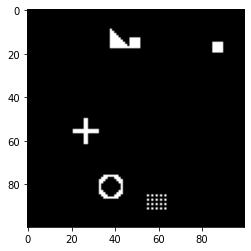

In [20]:
plt.imshow(input_images[0])
plt.show()

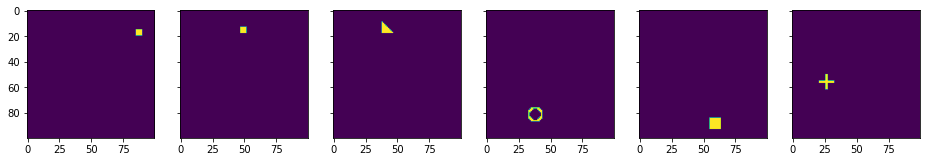

In [21]:
fig, axes = plt.subplots(ncols=6, figsize=(16, 4), sharey=True)
for i, ax in enumerate(axes.flat):
    ax.imshow(target_masks[0][i])

In [7]:
print(f"Number of images: {n_samples},\n"
      f"Image shape: {input_images[0].shape},\n"
      f"Number of classes/ masks in each image: {target_masks.shape[1]}")

Number of images: 1,
Image shape: (100, 100, 3),
Number of classes/ masks in each image: 6


In [22]:
target_images_color_masked = np.array(
    [data_generator.masks_to_colorimg(x) for x in target_masks])
target_images_color_masked.shape

(1, 100, 100, 3)

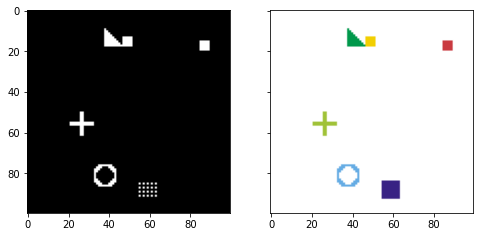

In [9]:
plot_utils.plot_side_by_side(grayscale_img=input_images[0], colored_mask_img=target_images_color_masked[0])

In [50]:
def dice_loss(true: np.ndarray, pred: np.ndarray):
     return 1 - 2 * np.sum(true * pred)/(
         np.sum(true**2 + pred**2))

In [51]:
true = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
pred = np.array([[.5, .7, .5], [.7, .9, .7], [.5, .7, .5]])

In [52]:
dice_loss(true, pred)

0.1562143671607754

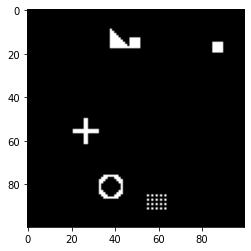

In [39]:
plt.imshow(input_imgs[0])

In [60]:
input_images_rgb = [x.astype(np.uint8) for x in input_imgs]


In [64]:
input_images_rgb[0].shape

(100, 100, 3)

In [75]:


# Map each channel (i.e. class) to each color
target_masks_rgb = np.asarray([data_generator.masks_to_colorimg(x) for x in target_masks])

In [76]:
target_masks_rgb.shape

(1, 100, 100, 3)

In [73]:
target_masks.shape

(1, 6, 100, 100)

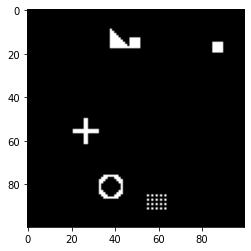

In [68]:
plt.imshow(input_imgs[0])

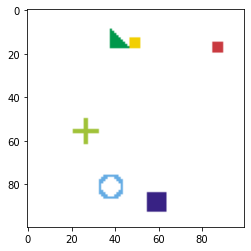

In [69]:
plt.imshow(target_masks_rgb[0])

In [70]:
target_masks_rgb[0].shape

(100, 100, 3)

In [79]:
def plot_side_by_side(grayscale_img: np.ndarray, 
                      colored_mask_img: np.ndarray):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(8, 4))
    ax1.imshow(grayscale_img)
    ax2.imshow(colored_mask_img)

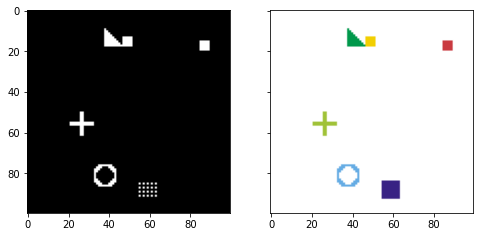

In [80]:
plot_side_by_side(input_imgs[0], target_masks_rgb[0])

In [30]:
target_masks * target_masks

(1, 6, 100, 100)

In [ ]:
input_imagess(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    

    intersection = (pred * target).sum(dim=2).sum(dim=2)
    
    
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
    
    return loss.mean()

In [51]:
var = torch.rand(size=(2, 6, 3, 3))

In [70]:
sum(var[0][0][:,0])

tensor(1.1810)

In [53]:
var.sum(dim=2).sum(dim=2)

tensor([[3.6166, 6.9974, 4.7440, 4.0658, 4.6563, 4.6210],
        [4.8472, 6.2575, 3.5775, 4.4571, 4.8857, 5.1219]])

In [54]:
[var[0][i].sum() for i in range(6)]

[tensor(3.6166),
 tensor(6.9974),
 tensor(4.7440),
 tensor(4.0658),
 tensor(4.6563),
 tensor(4.6210)]

In [67]:
var.sum(dim=2)

tensor([[[1.1810, 1.2452, 1.1903],
         [2.7734, 2.2312, 1.9929],
         [1.5682, 0.7652, 2.4106],
         [0.8754, 2.4309, 0.7594],
         [1.1810, 1.9276, 1.5478],
         [1.9624, 1.4283, 1.2303]],

        [[1.2300, 1.8716, 1.7456],
         [2.4467, 1.8658, 1.9450],
         [1.0956, 1.0026, 1.4794],
         [1.3882, 0.9131, 2.1558],
         [1.4848, 1.6876, 1.7134],
         [0.6806, 2.3235, 2.1177]]])

In [71]:
var.shape

torch.Size([2, 6, 3, 3])

In [75]:
var[0].sum(dim=2)

tensor([[1.5163, 0.9874, 1.1130],
        [2.5405, 2.3593, 2.0977],
        [1.4980, 2.4253, 0.8207],
        [0.9396, 1.3532, 1.7729],
        [1.8193, 0.9988, 1.8382],
        [0.6868, 2.0554, 1.8787]])